# Spark Overview

Apache Spark is an open-source, distributed cluster computing framework that is used for fast processing, querying and analyzing Big Data.

ref: https://www.analyticsvidhya.com/blog/2019/10/pyspark-for-beginners-first-steps-big-data-analysis/?utm_source=blog&utm_medium=working-with-pyspark-on-google-colab-for-data-scientists

### Spark Architecture

Apache Spark works in a master-slave architecture where the master is called “Driver” and slaves are called “Workers”. When you run a Spark application, Spark Driver creates a context that is an entry point to your application, and all operations (transformations and actions) are executed on worker nodes, and the resources are managed by Cluster Manager.

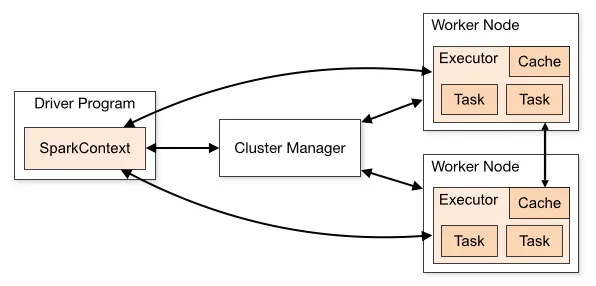

## Spark Applications

A Spark application is an instance of the Spark Context. It consists of a driver process and a set of executor processes.

The driver process is responsible for maintaining information about the Spark Application, responding to the code, distributing, and scheduling work across the executors. 

The executors are responsible for actually executing the work that the driver assigns them. So, each executor is responsible for only two things:

  * Executing code assigned to it by the driver, and
  * Reporting the state of the computation, on that executor, back to the driver node

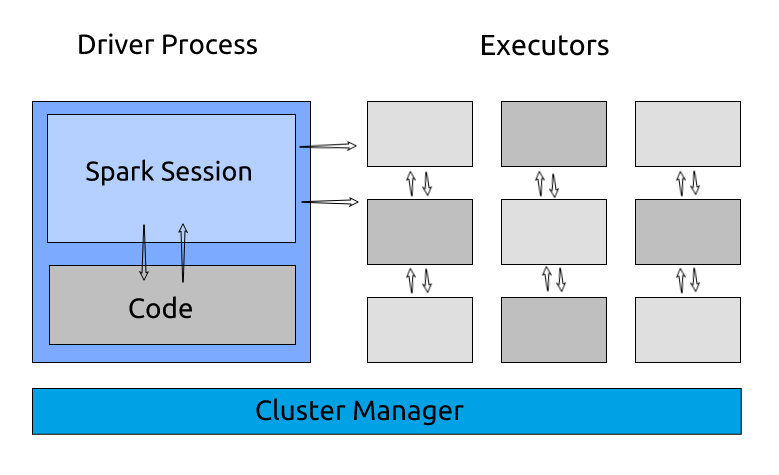

### Spark Session

The driver process makes itself available to the user as an object called the Spark Session. The Spark Session instance is the way Spark executes user-defined manipulations across the cluster.

### Partitions in Spark

Partitioning means that the complete data is not present in a single place. It is divided into multiple chunks and these chunks are placed on different nodes.

If you have one partition, Spark will only have a parallelism of one, even if you have thousands of executors. Also, if you have many partitions but only one executor, Spark will still only have a parallelism of one because there is only one computation resource.

In Spark, the lower level APIs allow us to define the number of partitions.

### Transformations in Spark

Data structures are **immutable** in Spark. This means that they cannot be changed once created. 

In order to make any change, we need to instruct Spark on how we would like to modify our data. These instructions are called **transformations**.

#### Narrow Transformation

In Narrow Transformations, all the elements that are required to compute the results of a single partition live in the single partition of the parent RDD. 

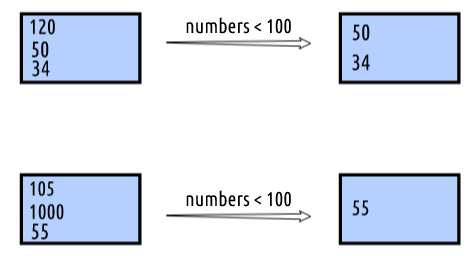

#### Wide Transformations

In wide stransformations, all the elements that are required to compute the results of single partitions may live in more than one partition of the parent RDD.

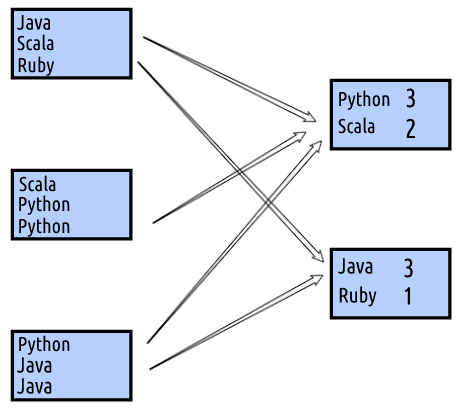

### Lazy Evaluation

Now, for large datasets, even a basic transformation will take millions of operations to execute.

It is essential to optimize these operations when working with Big Data, and Spark handles it in a very creative way. All you need to do is tell Spark what are the transformations you want to do on the dataset and Spark will maintain a series of transformations. When you ask for the results from Spark, it will then find out the best path and perform the required transformations and give you the result.

---

## Data Types in Spark MLlib

MLlib is Spark’s scalable Machine Learning library. It consists of common machine learning algorithms like Regression, Classification, Dimensionality Reduction, and some utilities to perform basic statistical operations on the data.

### Local Vector

MLlib supports two types of Local Vectors: dense and sparse. Sparse Vectors are used when most of the numbers are zero.

In [8]:
# To create a sparse vector, you need to provide the length of the vector – indices of non-zero values which should be strictly increasing and non-zero values.
import pyspark
from pyspark.mllib.linalg import Vectors

## Dense Vector
print(Vectors.dense([1,2,3,4,5,6,0]))

### SPARSE VECTOR 
### Vectors.sparse( length, index_of_non_zero_values, non_zero_values)
### Indices values should be strictly increasing

print(Vectors.sparse(10, [0,1,2,4,5], [1.0,5.0,3.0,5.0,7]))

print(Vectors.sparse(10, [0,1,2,4,5], [1.0,5.0,3.0,5.0,7]).toArray())

[1.0,2.0,3.0,4.0,5.0,6.0,0.0]
(10,[0,1,2,4,5],[1.0,5.0,3.0,5.0,7.0])
[1. 5. 3. 0. 5. 7. 0. 0. 0. 0.]


### Labeled Point

Labeled Point is a local vector where a label is assigned to each vector.

In [9]:
from pyspark.mllib.regression import LabeledPoint

# set a label against a Dense Vector
point_1 = LabeledPoint(1, Vectors.dense([1,2,3,4,5]))

# Features
print(point_1.features)

# Label
print(point_1.label)

[1.0,2.0,3.0,4.0,5.0]
1.0


### Local Matrix

Local Matrices are stored on a single machine. MLlib supports both dense and sparse matrices (Unlike numpy). In a Sparse matrix, non-zero entry values are stored in the Compressed Sparse Column (CSC) format in column-major order.

In [11]:
# import the Matrices
from pyspark.mllib.linalg import Matrices

# create a dense matrix of 3 rows and 2 columns
matrix_1 = Matrices.dense(3,2, [1,2,3,4,5,6])
print(matrix_1)

print(matrix_1.toArray())

# create a sparse matrix
matrix_2 = Matrices.sparse(3,3,[0,1,2,3],[0,0,2],[9,6,9])

print(matrix_2)

print(matrix_2.toArray())

DenseMatrix([[1., 4.],
             [2., 5.],
             [3., 6.]])
[[1. 4.]
 [2. 5.]
 [3. 6.]]
3 X 3 CSCMatrix
(0,0) 9.0
(0,1) 6.0
(2,2) 9.0
[[9. 6. 0.]
 [0. 0. 0.]
 [0. 0. 9.]]


### Distribute Matrix

Distributed matrices are stored in one or more RDDs. It is very important to choose the right format of distributed matrices. Four types of distributed matrices have been implemented so far

#### Row Matrix
  * Each row is local vector. We can store rows on multiple partitions.
  * Algorithms like Random Forest can be implemented using Row Matrix as the algorithm divides the rows to create multiple trees. The result of one tree is not dependent on other trees. So, we can make use of the distributed architecture and do parallel processing for algorithms like Random Forest for Big Data

In [14]:
# Distributed Data Type - Row Matrix
from pyspark.mllib.linalg.distributed import RowMatrix

# create RDD
rows = sc.parallelize([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])

# create a distributed Row Matrix
row_matrix = RowMatrix(rows)


print(row_matrix)
# >> <pyspark.mllib.linalg.distributed.RowMatrix at 0x7f425884d7f0> 

print(row_matrix.numRows())
# >> 4

print(row_matrix.numCols())


4
3


#### Indexed Row Matrix

  * It is similar to the row matrix where rows are stored in multiple partitions but in an ordered manner. An index value is assigned to each row. It is used in algorithms where the order is important like Time Series data

  * It can be created from an RDD of IndexedRow

In [15]:
# Indexed Row Matrix

from pyspark.mllib.linalg.distributed import IndexedRow, IndexedRowMatrix

# create RDD
indexed_rows = sc.parallelize([
    IndexedRow(0, [0,1,2]),
    IndexedRow(1, [1,2,3]),
    IndexedRow(2, [3,4,5]),
    IndexedRow(3, [4,2,3]),
    IndexedRow(4, [2,2,5]),
    IndexedRow(5, [4,5,5])
])

# create IndexedRowMatrix
indexed_rows_matrix = IndexedRowMatrix(indexed_rows)

print(indexed_rows_matrix.numRows())
# >> 6

print(indexed_rows_matrix.numCols())
# >> 3

6
3


#### Coordinate Matrix

  * A coordinate matrix can be created from an RDD of MatrixEntry
  * We only use a Coordinate matrix when both the dimensions of the matrix are large

In [16]:
from pyspark.mllib.linalg.distributed import CoordinateMatrix, MatrixEntry

# Create an RDD of coordinate entries with the MatrixEntry class:
matrix_entries = sc.parallelize([MatrixEntry(0, 5, 2), MatrixEntry(1, 1, 1), MatrixEntry(1, 5, 4)])

# Create an CoordinateMatrix from an RDD of MatrixEntries.
c_matrix = CoordinateMatrix(matrix_entries)

# number of columns
print(c_matrix.numCols())
# >> 6

# number of rows
print(c_matrix.numRows())
# >> 2

6
2


#### Block Matrix
  * In a Block Matrix, we can store different sub-matrices of a large matrix on different machines
  * We need to specify the block dimensions. Like in the below example, we have 3X3 and for each of the blocks, we can specify a matrix by providing the coordinates

In [18]:
# import the libraries
from pyspark.mllib.linalg import Matrices
from pyspark.mllib.linalg.distributed import BlockMatrix

# Create an RDD of sub-matrix blocks.
blocks = sc.parallelize([((0, 0), Matrices.dense(3, 3, [1, 2, 1, 2, 1, 2, 1, 2, 1])),
                         ((1, 1), Matrices.dense(3, 3, [3, 4, 5, 3, 4, 5, 3, 4, 5])),
                         ((2, 0), Matrices.dense(3, 3, [1, 1, 1, 1, 1, 1, 1, 1, 1]))])

# Create a BlockMatrix from an RDD of sub-matrix blocks  of size 3X3
b_matrix = BlockMatrix(blocks, 3, 3) 

# columns per block
print(b_matrix.colsPerBlock)
# >> 3

# rows per block
print(b_matrix.rowsPerBlock)
# >> 3

# convert the block matrix to local matrix
local_mat = b_matrix.toLocalMatrix()

# print local matrix
print(local_mat.toArray())


3
3
[[1. 2. 1. 0. 0. 0.]
 [2. 1. 2. 0. 0. 0.]
 [1. 2. 1. 0. 0. 0.]
 [0. 0. 0. 3. 3. 3.]
 [0. 0. 0. 4. 4. 4.]
 [0. 0. 0. 5. 5. 5.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]]


-------

# PySpark

PySpark is a Spark library written in Python to run Python application using Apache Spark capabilities, using PySpark we can run applications parallelly on the distributed cluster (multiple nodes).

Ref: https://sparkbyexamples.com/pyspark-tutorial/

## PySpark Modules & Packages

* PySpark RDD (pyspark.RDD)
* PySpark DataFrame and SQL (pyspark.sql)
* PySpark Streaming (pyspark.streaming)
* PySpark MLib (pyspark.ml, pyspark.mllib)
* PySpark GraphFrames (GraphFrames)
* PySpark Resource (pyspark.resource) It’s new in PySpark 3.0

* Third parties libraries can be found here: https://spark-packages.org/

---

# PySpark RDD - Resilient Distributed Dataset

PySpark RDD (Resilient Distributed Dataset) is a fundamental data structure of PySpark that is fault-tolerant, immutable distributed collections of objects, which means once you create an RDD you cannot change it. Each dataset in RDD is divided into logical partitions, which can be computed on different nodes of the cluster.

## Preparation


### Colab Preparation

Ref: https://colab.research.google.com/drive/1Tu7xeYM0qBB-RkqLSnYGrIyzb3q7bYo1#scrollTo=k-qHai2252mI

In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 46.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=cdff547068c80e7ffecda177e3763bfd5e413ef697878d05d2ae5ff893428ed0
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get

### Create a SparkSession (entry point to the PySpark application).

In [2]:
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [3]:
# Print the SparkSession variable
spark

### Spark UI

In [5]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!sleep 10
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2022-05-05 16:37:47--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  56.6MB/s    in 0.2s    

2022-05-05 16:37:47 (56.6 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
http://6494-35-231-18-6.ngrok.io


In [6]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2022-05-05 16:38:22--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  56.3MB/s    in 0.2s    

2022-05-05 16:38:22 (56.3 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ngrok                   
{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://6494-35-231-18-6.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0

## Loading data into PySpark

In [4]:
# inferSchema parameter provided enable Spark to automatically determine the data type for each column
df = spark.read.csv("train.csv", header=True, inferSchema=True)

## Data Exploration with PySpark DF

#### Show column details

In [5]:
df.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Purchase: integer (nullable = true)



#### Display Rows

In [6]:
df.show(5)

+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1000001| P00069042|     F|0-17|        10|            A|                         2|             0|                 3|              null|              null|    8370|
|1000001| P00248942|     F|0-17|        10|            A|                         2|             0|                 1|                 6|                14|   15200|
|1000001| P00087842|     F|0-17|        10|            A|                         2|             0|                12|              null|              null|    1422|
|100

#### Number of rows in DF

In [7]:
df.count()

550068

#### Display specific columns

In [8]:
df.select("User_ID", "Gender","Age", "Occupation").show(5)

+-------+------+----+----------+
|User_ID|Gender| Age|Occupation|
+-------+------+----+----------+
|1000001|     F|0-17|        10|
|1000001|     F|0-17|        10|
|1000001|     F|0-17|        10|
|1000001|     F|0-17|        10|
|1000002|     M| 55+|        16|
+-------+------+----+----------+
only showing top 5 rows



#### Display Specific columns

In [11]:
df.describe().show()

+-------+------------------+----------+------+------+-----------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|summary|           User_ID|Product_ID|Gender|   Age|       Occupation|City_Category|Stay_In_Current_City_Years|     Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|         Purchase|
+-------+------------------+----------+------+------+-----------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|  count|            550068|    550068|550068|550068|           550068|       550068|                    550068|             550068|            550068|            376430|            166821|           550068|
|   mean|1003028.8424013031|      null|  null|  null|8.076706879876669|         null|         1.468494139793958|0.40965298835780306| 5.404270017525106| 9.84232925112238

#### Distinct values for Categorical columns

In [12]:
df.select("City_Category").distinct().show()

+-------------+
|City_Category|
+-------------+
|            B|
|            C|
|            A|
+-------------+



#### Aggregate with Groupby

In [13]:
from pyspark.sql import functions as F
df.groupBy("City_Category").agg(F.sum("Purchase")).show()

+-------------+-------------+
|City_Category|sum(Purchase)|
+-------------+-------------+
|            B|   2115533605|
|            C|   1663807476|
|            A|   1316471661|
+-------------+-------------+



#### Counting and Removing Null values

In [14]:
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|      0|         0|     0|  0|         0|            0|                         0|             0|                 0|            173638|            383247|       0|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+



#### Filling NAs

In [15]:
# Spark dataframe is immutable
df = df.fillna({'Product_Category_2':0, "Product_Category_3": 0})

#### Save to file

In [16]:
df.write.csv("preprocessed_Data")

# However, there is not only a single CSV saved but multiple dependeing on the number of partitons of the dataframe.
# Check here
df.rdd.getNumPartitions()

2

In [17]:
# Spark df to Pandas df 
df_pd = df.toPandas()

# Store result
df_pd.to_csv("pandas_preprocessed_data.csv")

#### Drop columns

Use the asterisk (*) sign before the list to drop multiple columns from the dataset

my_data = df.drop(*["col1","col2"] 

my_data.columns

## Machine Learning in PySpark

ref: `https://www.analyticsvidhya.com/blog/2019/11/build-machine-learning-pipelines-pyspark/?utm_source=blog&utm_medium=working-with-pyspark-on-google-colab-for-data-scientists`

### Data Prepration

#### Read a csv file

In [18]:
# read a csv file
my_data = spark.read.csv('ind-ban-comment.csv')

# see the default schema of the dataframe
my_data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)



#### Defining the Schema

We can define the custom schema for our dataframe in Spark. For this, we need to create an object of StructType which takes a list of StructField. And of course, we should define StructField with a column name, the data type of the column and whether null values are allowed for the particular column or not.

In [19]:
import pyspark.sql.types as tp

# define the schema
my_schema = tp.StructType([
    tp.StructField(name= 'Batsman',      dataType= tp.IntegerType(),   nullable= True),
    tp.StructField(name= 'Batsman_Name', dataType= tp.StringType(),    nullable= True),
    tp.StructField(name= 'Bowler',       dataType= tp.IntegerType(),   nullable= True),
    tp.StructField(name= 'Bowler_Name',  dataType= tp.StringType(),    nullable= True),
    tp.StructField(name= 'Commentary',   dataType= tp.StringType(),    nullable= True),
    tp.StructField(name= 'Detail',       dataType= tp.StringType(),    nullable= True),
    tp.StructField(name= 'Dismissed',    dataType= tp.IntegerType(),   nullable= True),
    tp.StructField(name= 'Id',           dataType= tp.IntegerType(),   nullable= True),
    tp.StructField(name= 'Isball',       dataType= tp.BooleanType(),   nullable= True),
    tp.StructField(name= 'Isboundary',   dataType= tp.BinaryType(),   nullable= True),
    tp.StructField(name= 'Iswicket',     dataType= tp.BinaryType(),   nullable= True),
    tp.StructField(name= 'Over',         dataType= tp.DoubleType(),    nullable= True),
    tp.StructField(name= 'Runs',         dataType= tp.IntegerType(),   nullable= True),
    tp.StructField(name= 'Timestamp',    dataType= tp.TimestampType(), nullable= True)    
])

# read the data again with the defined schema
my_data = spark.read.csv('ind-ban-comment.csv',schema= my_schema,header= True)

# print the schema
my_data.printSchema()

root
 |-- Batsman: integer (nullable = true)
 |-- Batsman_Name: string (nullable = true)
 |-- Bowler: integer (nullable = true)
 |-- Bowler_Name: string (nullable = true)
 |-- Commentary: string (nullable = true)
 |-- Detail: string (nullable = true)
 |-- Dismissed: integer (nullable = true)
 |-- Id: integer (nullable = true)
 |-- Isball: boolean (nullable = true)
 |-- Isboundary: binary (nullable = true)
 |-- Iswicket: binary (nullable = true)
 |-- Over: double (nullable = true)
 |-- Runs: integer (nullable = true)
 |-- Timestamp: timestamp (nullable = true)



#### Drop columns from the data

In [20]:
# Drop the columns that are not required
my_data = my_data.drop(*['Batsman', 'Bowler', 'Id'])
my_data.columns 

['Batsman_Name',
 'Bowler_Name',
 'Commentary',
 'Detail',
 'Dismissed',
 'Isball',
 'Isboundary',
 'Iswicket',
 'Over',
 'Runs',
 'Timestamp']

### Data Exploration using PySpark

#### Check the Data Dimensions

In [21]:
# Unlike pandas, no shape function can be used
(my_data.count()), len(my_data.columns)

(605, 11)

#### Describe the Data

In [22]:
# Get the summary of numerical columns
my_data.select("Isball", "Isboundary", "Runs").describe().show()

+-------+------------------+
|summary|              Runs|
+-------+------------------+
|  count|               605|
|   mean|0.9917355371900827|
| stddev| 1.342725481259329|
|    min|                 0|
|    max|                 6|
+-------+------------------+



#### Missing value counts

In [29]:
# import sql function pyspark
import pyspark.sql.functions as f

# null values in each column
data_agg = my_data.agg(*[f.count(f.when(f.isnull(c), c)).alias(c) for c in my_data.columns])

#### Value Counts of a Column

In [30]:
# value counts of Batsman_name column
my_data.groupBy('Batsman_Name').count().show()

+------------------+-----+
|      Batsman_Name|count|
+------------------+-----+
|     Soumya Sarkar|   39|
|  Mashrafe Mortaza|    5|
|   Shakib Al Hasan|   75|
|   Mushfiqur Rahim|   23|
|Mohammad Saifuddin|   42|
|         Liton Das|   24|
|      Rishabh Pant|   43|
|    Mohammed Shami|    2|
|       Tamim Iqbal|   31|
|     Hardik Pandya|    2|
|          KL Rahul|   93|
| Bhuvneshwar Kumar|    4|
|     Rubel Hossain|   11|
|      Rohit Sharma|   94|
|    Dinesh Karthik|    9|
|       Virat Kohli|   27|
|          MS Dhoni|   33|
|     Sabbir Rahman|   40|
|  Mosaddek Hossain|    7|
| Mustafizur Rahman|    1|
+------------------+-----+



### Encode Categorical Variables

#### String Indexing

In [34]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# Create object of stringindexer class and specify input and output column
SI_batsman = StringIndexer(inputCol="Batsman_Name", outputCol='Batsman_Index')
SI_bowler = StringIndexer(inputCol='Bowler_Name', outputCol='Bowler_Index')

# Transform the data
my_data = SI_batsman.fit(my_data).transform(my_data)
my_data = SI_bowler.fit(my_data).transform(my_data)

# View the transformed data
my_data.select('Batsman_Name', 'Batsman_Index', 'Bowler_Name', 'Bowler_Index').show(10)

+-----------------+-------------+------------------+------------+
|     Batsman_Name|Batsman_Index|       Bowler_Name|Bowler_Index|
+-----------------+-------------+------------------+------------+
|   Mohammed Shami|         18.0| Mustafizur Rahman|         0.0|
|Bhuvneshwar Kumar|         16.0| Mustafizur Rahman|         0.0|
|   Mohammed Shami|         18.0| Mustafizur Rahman|         0.0|
|Bhuvneshwar Kumar|         16.0| Mustafizur Rahman|         0.0|
|         MS Dhoni|          7.0| Mustafizur Rahman|         0.0|
|         MS Dhoni|          7.0| Mustafizur Rahman|         0.0|
|         MS Dhoni|          7.0| Mustafizur Rahman|         0.0|
|         MS Dhoni|          7.0|Mohammad Saifuddin|         8.0|
|         MS Dhoni|          7.0|Mohammad Saifuddin|         8.0|
|         MS Dhoni|          7.0|Mohammad Saifuddin|         8.0|
+-----------------+-------------+------------------+------------+
only showing top 10 rows



#### One-Hot Encoding

In [35]:
# create object and specify input and output column
ONE = OneHotEncoder(inputCols=['Batsman_Index', 'Bowler_Index'],outputCols=['Batsman_OHE', 'Bowler_OHE'])

# Transform the data 
my_data = ONE.fit(my_data).transform(my_data)

# view and transform the data
my_data.select('Batsman_Name', 'Batsman_Index', 'Batsman_OHE', 'Bowler_Name', 'Bowler_Index', 'Bowler_OHE').show(10)

+-----------------+-------------+---------------+------------------+------------+--------------+
|     Batsman_Name|Batsman_Index|    Batsman_OHE|       Bowler_Name|Bowler_Index|    Bowler_OHE|
+-----------------+-------------+---------------+------------------+------------+--------------+
|   Mohammed Shami|         18.0|(19,[18],[1.0])| Mustafizur Rahman|         0.0|(11,[0],[1.0])|
|Bhuvneshwar Kumar|         16.0|(19,[16],[1.0])| Mustafizur Rahman|         0.0|(11,[0],[1.0])|
|   Mohammed Shami|         18.0|(19,[18],[1.0])| Mustafizur Rahman|         0.0|(11,[0],[1.0])|
|Bhuvneshwar Kumar|         16.0|(19,[16],[1.0])| Mustafizur Rahman|         0.0|(11,[0],[1.0])|
|         MS Dhoni|          7.0| (19,[7],[1.0])| Mustafizur Rahman|         0.0|(11,[0],[1.0])|
|         MS Dhoni|          7.0| (19,[7],[1.0])| Mustafizur Rahman|         0.0|(11,[0],[1.0])|
|         MS Dhoni|          7.0| (19,[7],[1.0])| Mustafizur Rahman|         0.0|(11,[0],[1.0])|
|         MS Dhoni|          7

### Vector Assembler

A vector assembler combines a given list of columns into a single vector column.

The Vector Assembler converts them into a single feature column in order to train the machine learning model 

In [38]:
from pyspark.ml.feature import VectorAssembler

# specify trhe input and output columns of the vector assembler
assembler = VectorAssembler(inputCols=[
                                       'Over',
                                       'Runs',
                                       'Batsman_Index',
                                       'Bowler_Index',
                                       'Batsman_OHE',
                                       'Bowler_OHE'],
                           outputCol='vector')

# Fill the null values
my_data = my_data.fillna(0)

# Transform the data
final_data = assembler.transform(my_data)

# View the transformed vector
final_data.select('vector').show()

+--------------------+
|              vector|
+--------------------+
|(34,[0,2,22,23],[...|
|(34,[0,1,2,20,23]...|
|(34,[0,1,2,22,23]...|
|(34,[0,1,2,20,23]...|
|(34,[0,2,11,23],[...|
|(34,[0,2,11,23],[...|
|(34,[0,2,11,23],[...|
|(34,[0,1,2,3,11,3...|
|(34,[0,1,2,3,11,3...|
|(34,[0,2,3,11,31]...|
|(34,[0,2,3,11,31]...|
|(34,[0,1,2,3,11,3...|
|(34,[0,1,2,3,11,3...|
|(34,[0,2,20,23],[...|
|(34,[0,1,2,11,23]...|
|(34,[0,2,11,23],[...|
|(34,[0,1,2,20,23]...|
|(34,[0,2,17,23],[...|
|(34,[0,1,2,11,23]...|
|(34,[0,1,2,3,11,3...|
+--------------------+
only showing top 20 rows



### Building Machine Learning Pipelines

 Transformers convert one dataframe into another either by updating the current values of a particular column (like converting categorical columns to numeric) or mapping it to some other values by using a defined logic.

An Estimator implements the fit() method on a dataframe and produces a model. For example, LogisticRegression is an Estimator that trains a classification model when we call the fit() method.

#### Eg1

In [39]:
from pyspark.ml import Pipeline

# create a sample dataframe
sample_df = spark.createDataFrame([
    (1, 'L101', 'R'),
    (2, 'L201', 'C'),
    (3, 'D111', 'R'),
    (4, 'F210', 'R'),
    (5, 'D110', 'C')
], ['id', 'category_1', 'category_2'])

sample_df.show()

+---+----------+----------+
| id|category_1|category_2|
+---+----------+----------+
|  1|      L101|         R|
|  2|      L201|         C|
|  3|      D111|         R|
|  4|      F210|         R|
|  5|      D110|         C|
+---+----------+----------+



stage_1: Label Encode or String Index the column category_1
stage_2: Label Encode or String Index the column category_2
stage_3: One-Hot Encode the indexed column category_2

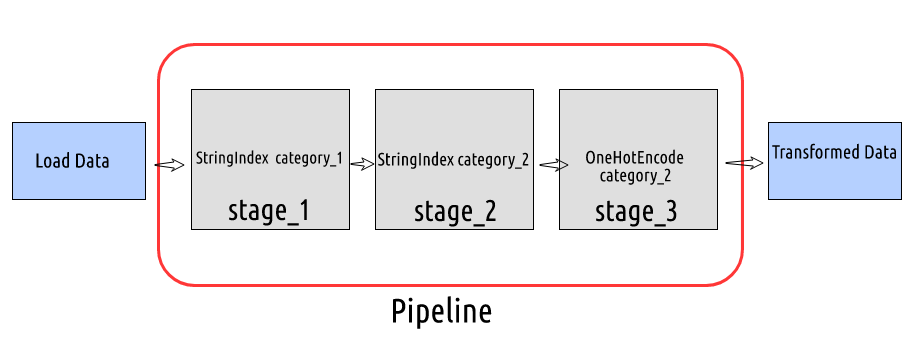

In [42]:
# define stage 1 : transform the column category_1 to numeric
stage_1 = StringIndexer(inputCol= 'category_1', outputCol= 'category_1_index')
# define stage 2 : transform the column category_2 to numeric
stage_2 = StringIndexer(inputCol= 'category_2', outputCol= 'category_2_index')
# define stage 3 : one hot encode the numeric category_2 column
stage_3 = OneHotEncoder(inputCols=['category_2_index'], outputCols=['category_2_OHE'])

# setup the pipeline
pipeline = Pipeline(stages=[stage_1, stage_2, stage_3])

# fit the pipeline model and transform the data
pipeline_model = pipeline.fit(sample_df)
sample_df_updated = pipeline_model.transform(sample_df)

# view the transformed data
sample_df_updated.show()

+---+----------+----------+----------------+----------------+--------------+
| id|category_1|category_2|category_1_index|category_2_index|category_2_OHE|
+---+----------+----------+----------------+----------------+--------------+
|  1|      L101|         R|             3.0|             0.0| (1,[0],[1.0])|
|  2|      L201|         C|             4.0|             1.0|     (1,[],[])|
|  3|      D111|         R|             1.0|             0.0| (1,[0],[1.0])|
|  4|      F210|         R|             2.0|             0.0| (1,[0],[1.0])|
|  5|      D110|         C|             0.0|             1.0|     (1,[],[])|
+---+----------+----------+----------------+----------------+--------------+



#### Eg2

In [43]:
from pyspark.ml.classification import LogisticRegression

# create a sample dataframe with 4 features and 1 label column
sample_data_train = spark.createDataFrame([
    (2.0, 'A', 'S10', 40, 1.0),
    (1.0, 'X', 'E10', 25, 1.0),
    (4.0, 'X', 'S20', 10, 0.0),
    (3.0, 'Z', 'S10', 20, 0.0),
    (4.0, 'A', 'E10', 30, 1.0),
    (2.0, 'Z', 'S10', 40, 0.0),
    (5.0, 'X', 'D10', 10, 1.0),
], ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'label'])

# view the data
sample_data_train.show()

+---------+---------+---------+---------+-----+
|feature_1|feature_2|feature_3|feature_4|label|
+---------+---------+---------+---------+-----+
|      2.0|        A|      S10|       40|  1.0|
|      1.0|        X|      E10|       25|  1.0|
|      4.0|        X|      S20|       10|  0.0|
|      3.0|        Z|      S10|       20|  0.0|
|      4.0|        A|      E10|       30|  1.0|
|      2.0|        Z|      S10|       40|  0.0|
|      5.0|        X|      D10|       10|  1.0|
+---------+---------+---------+---------+-----+



stage_1: Label Encode or String Index the column feature_2
stage_2: Label Encode or String Index the column feature_3
stage_3: One Hot Encode the indexed column of feature_2 and feature_3
stage_4: Create a vector of all the features required to train a Logistic Regression model
stage_5: Build a Logistic Regression model

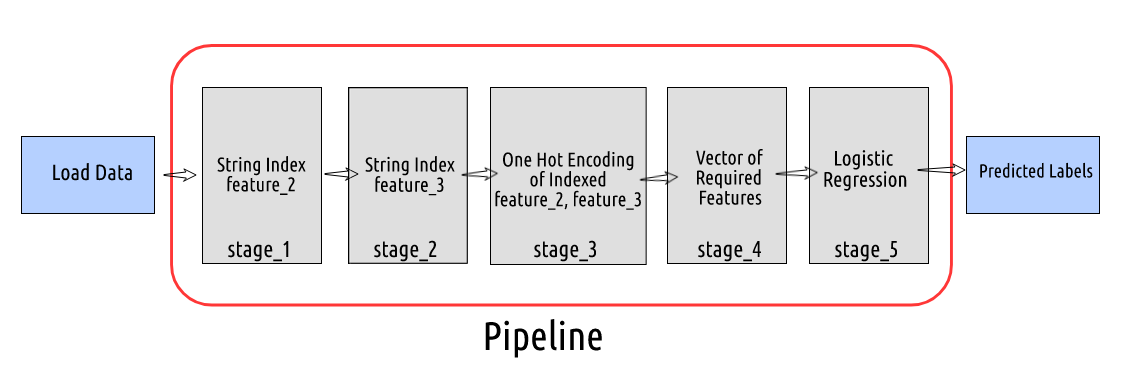

In [44]:
# define stage 1: transform the column feature_2 to numeric
stage_1 = StringIndexer(inputCol= 'feature_2', outputCol= 'feature_2_index')
# define stage 2: transform the column feature_3 to numeric
stage_2 = StringIndexer(inputCol= 'feature_3', outputCol= 'feature_3_index')
# define stage 3: one hot encode the numeric versions of feature 2 and 3 generated from stage 1 and stage 2
stage_3 = OneHotEncoder(inputCols=[stage_1.getOutputCol(), stage_2.getOutputCol()], 
                                 outputCols= ['feature_2_encoded', 'feature_3_encoded'])
# define stage 4: create a vector of all the features required to train the logistic regression model 
stage_4 = VectorAssembler(inputCols=['feature_1', 'feature_2_encoded', 'feature_3_encoded', 'feature_4'],
                          outputCol='features')
# define stage 5: logistic regression model                          
stage_5 = LogisticRegression(featuresCol='features',labelCol='label')

# setup the pipeline
regression_pipeline = Pipeline(stages= [stage_1, stage_2, stage_3, stage_4, stage_5])

# fit the pipeline for the trainind data
model = regression_pipeline.fit(sample_data_train)

# transform the data
sample_data_train = model.transform(sample_data_train)

# view some of the columns generated
sample_data_train.select('features', 'label', 'rawPrediction', 'probability', 'prediction').show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[2.0,0.0,1.0,1.0,...|  1.0|[-18.225955511073...|[1.21497709009896...|       1.0|
|[1.0,1.0,0.0,0.0,...|  1.0|[-18.358243459851...|[1.06442768895384...|       1.0|
|(7,[0,1,6],[4.0,1...|  0.0|[18.3563077658455...|[0.99999998933509...|       0.0|
|(7,[0,3,6],[3.0,1...|  0.0|[27.4123701842630...|[0.99999999999875...|       0.0|
|[4.0,0.0,1.0,0.0,...|  1.0|[-35.975077013624...|[2.37805868027895...|       1.0|
|(7,[0,3,6],[2.0,1...|  0.0|[18.2316263610007...|[0.99999998791893...|       0.0|
|[5.0,1.0,0.0,0.0,...|  1.0|[-19.243972131253...|[4.38984404457991...|       1.0|
+--------------------+-----+--------------------+--------------------+----------+



#### Create a test data

In [45]:
# create a sample data without the labels
sample_data_test = spark.createDataFrame([
    (3.0, 'Z', 'S10', 40),
    (1.0, 'X', 'E10', 20),
    (4.0, 'A', 'S20', 10),
    (3.0, 'A', 'S10', 20),
    (4.0, 'X', 'D10', 30),
    (1.0, 'Z', 'E10', 20),
    (4.0, 'A', 'S10', 30),
], ['feature_1', 'feature_2', 'feature_3', 'feature_4'])

# transform the data using the pipeline
sample_data_test = model.transform(sample_data_test)

# see the predictions on the test data
sample_data_test.select('features', 'rawPrediction', 'probability', 'prediction').show()

+--------------------+--------------------+--------------------+----------+
|            features|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|(7,[0,3,6],[3.0,1...|[22.1178979709695...|[0.99999999975207...|       0.0|
|[1.0,1.0,0.0,0.0,...|[-17.034625406528...|[3.99904385954833...|       1.0|
|(7,[0,2,6],[4.0,1...|[-9.5957225645106...|[6.80144359960515...|       1.0|
|[3.0,0.0,1.0,1.0,...|[-9.0452116878111...|[1.17940578148844...|       1.0|
|[4.0,1.0,0.0,0.0,...|[-28.424715954515...|[4.52171006114669...|       1.0|
|(7,[0,4,6],[1.0,1...|[-8.5290738648104...|[1.97598871597202...|       1.0|
|[4.0,0.0,1.0,1.0,...|[-7.8061761844890...|[4.07046424555585...|       1.0|
+--------------------+--------------------+--------------------+----------+

